In [1]:
# %matplotlib qt5
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
symbols_dict = {
    0: "a",
    1: "b",
    2: "c",
    3: "d",
    4: "e",
    5: "f",
    6: "g",
    7: "i",
    8: "j",
    9: "k",
}

print(symbols_dict.keys())
print(symbols_dict.values())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
dict_values(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'j', 'k'])


(100, 8, 400)


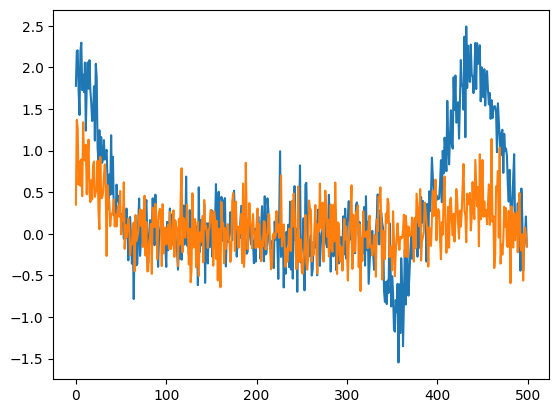

In [3]:
p300_wave = np.sin(np.arange(-np.pi / 2, np.pi * 2 * 0.75, 0.05)) + 1
n100_wave = (
    -0.5 * np.sin(3 * np.arange(-3 / 2 * np.pi, -5 / 6 * np.pi, 0.05)) - 0.5
)
n_trials = 10
n_letters = 10
n_ch = 8

dataset_simul = []
targets = []
for i in range(n_letters):
    for j in range(n_trials):
        n_before = random.randint(90, 150)
        n_after = 232 - n_before

        before_ = np.repeat(0, n_before)
        after_ = np.repeat(0, n_after)

        sample_wave = np.concatenate([before_, n100_wave, p300_wave, after_])
        noise = np.random.normal(0, 0.3, len(sample_wave))

        data_temp = [sample_wave + noise]
        for ch in range(1, n_ch):
            wave_amp = random.uniform(0.1, 0.4)
            noise = np.random.normal(0, 0.3, len(sample_wave))
            data_temp.append(sample_wave * wave_amp + noise)
        dataset_simul.append(np.array(data_temp))
        targets.append([symbols_dict[i], j])
dataset_simul = np.array(dataset_simul)
print(dataset_simul.shape)

plt.plot(np.concatenate(dataset_simul, axis=1)[0, 1000:1500])
plt.plot(np.concatenate(dataset_simul, axis=1)[1, 1000:1500])

In [9]:
dataset_simul.shape

(100, 8, 400)

In [11]:
len(targets)

100

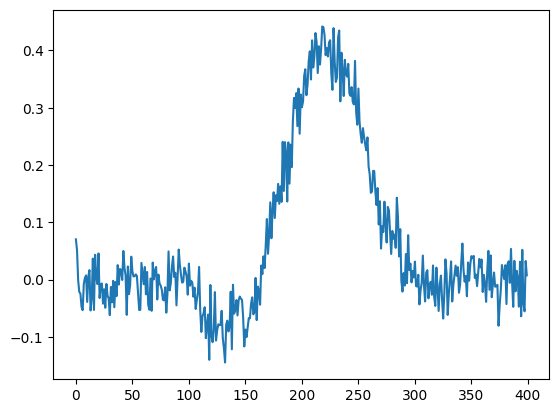

In [4]:
plt.plot(dataset_simul[:, 1, :].mean(axis=0))

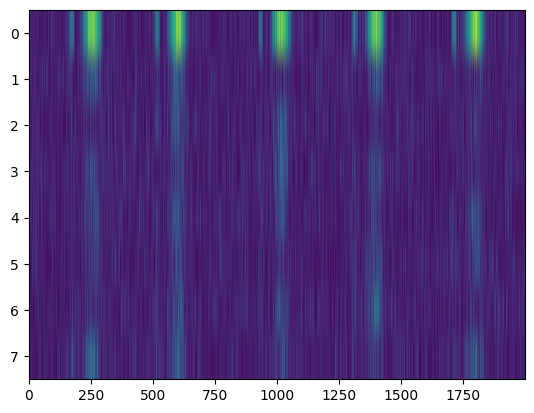

In [5]:
plt.imshow(
    abs(np.concatenate(dataset_simul, axis=1)[:, 10000:12000]),
    aspect="auto",
    interpolation=None,
)

In [6]:
targets2type = list(symbols_dict.values()) * 3
random.shuffle(targets2type)

add_timepoints = [30, 60]

n_gazes_min = 3
n_gazes_max = 6

new_dataset_simul = []

for letter2type in targets2type:
    n_gazes = random.randint(n_gazes_min, n_gazes_max)

    idx_data = [targets.index(tar) for tar in targets if tar[0] == letter2type]
    data2add = dataset_simul[random.sample(idx_data, n_gazes), :, :]
    new_data2add = []
    for i in range(len(data2add)):
        n_timepoints_between_samples = random.randint(
            add_timepoints[0], add_timepoints[1]
        )
        noise = np.random.normal(0, 0.3, (n_ch, n_timepoints_between_samples))
        new_data2add.append(np.append(data2add[i], noise, axis=-1))
    new_dataset_simul.append(np.concatenate(new_data2add, axis=-1))
new_dataset_simul = np.concatenate(new_dataset_simul, axis=-1)
print(new_dataset_simul.shape)

(8, 58203)
